In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_with_discounts.csv')  # Replace with actual file path

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

 
# Compute statistics separately to avoid aggregation issues
stats_df = pd.DataFrame(index=numerical_cols)
stats_df['mean'] = df[numerical_cols].mean()
stats_df['median'] = df[numerical_cols].median() 
stats_df['std'] = df[numerical_cols].std()
stats_df['mode'] = df[numerical_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("\nDescriptive Statistics:")
print(stats_df)



Descriptive Statistics:
                           mean       median           std          mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801


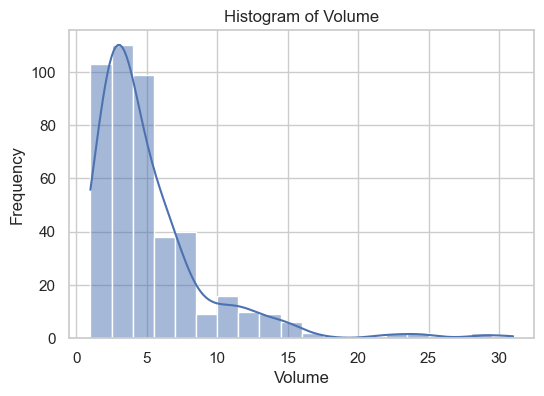

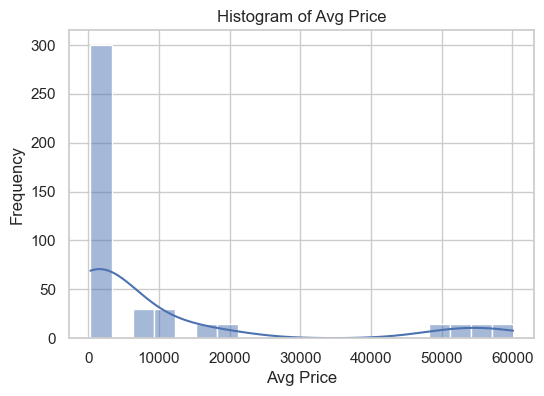

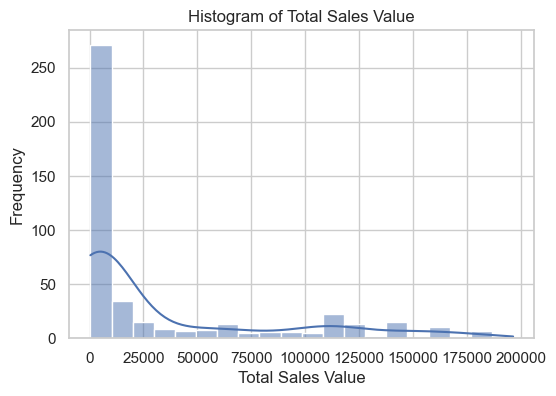

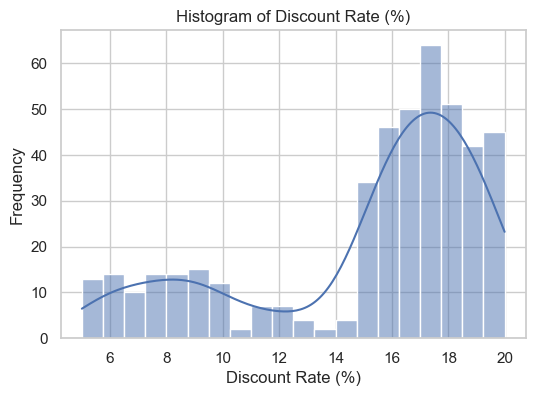

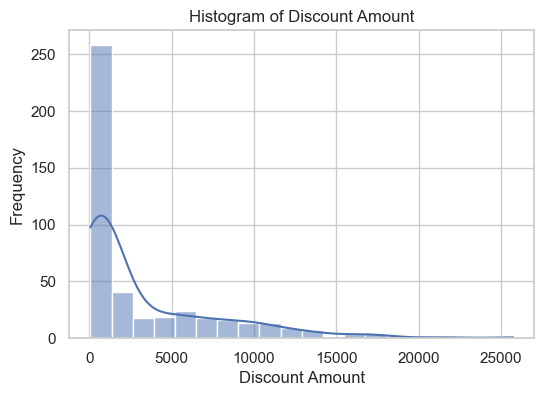

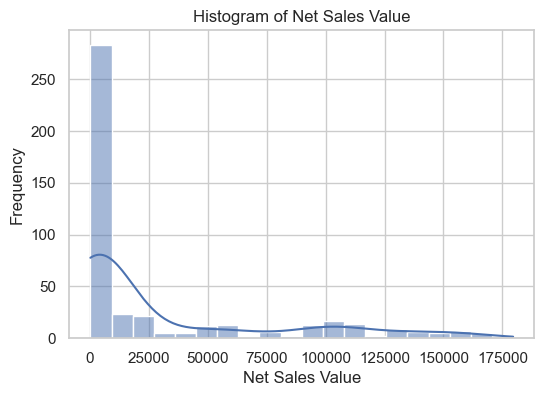

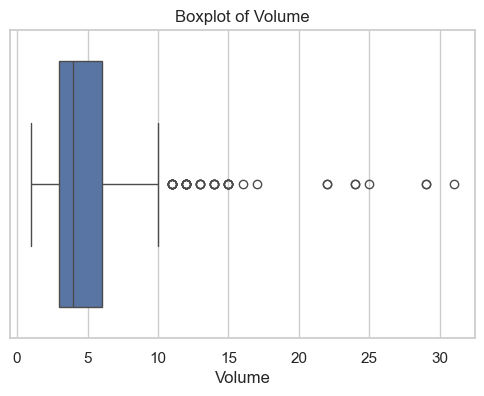

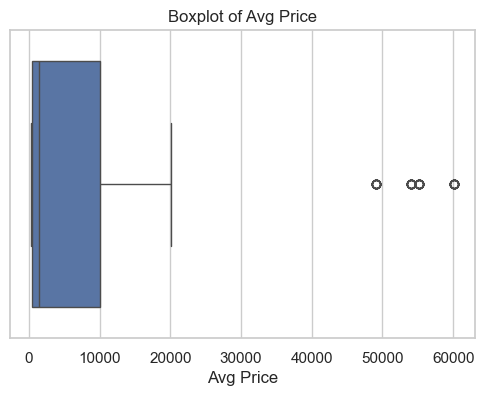

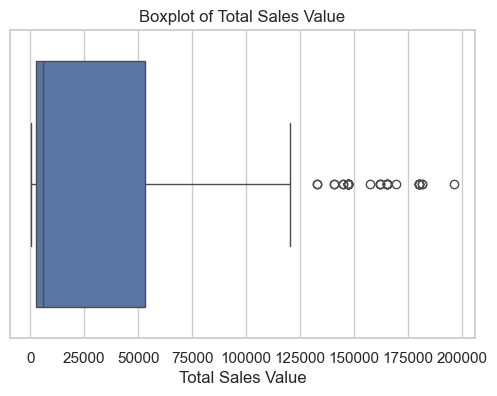

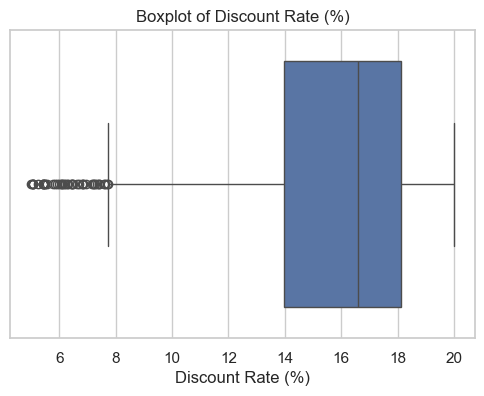

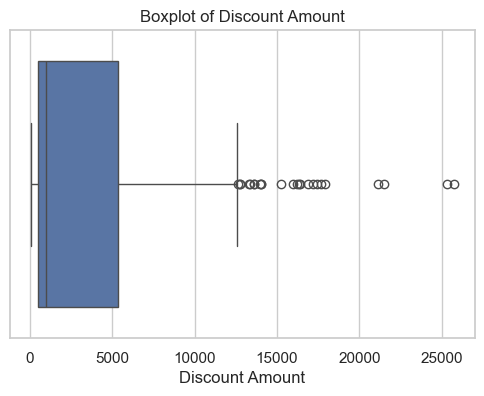

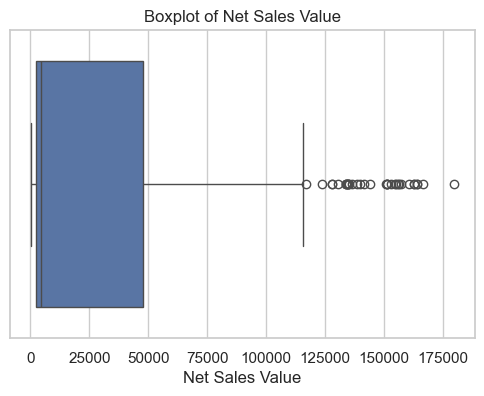

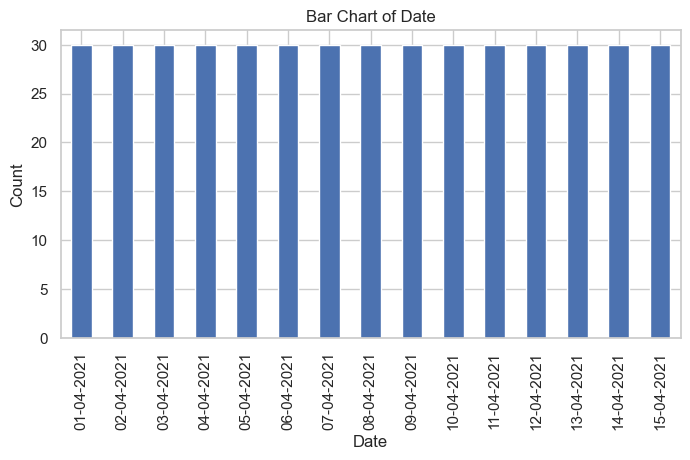

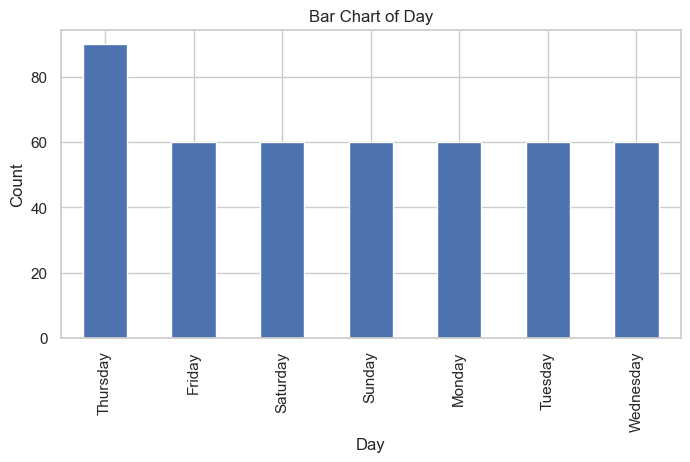

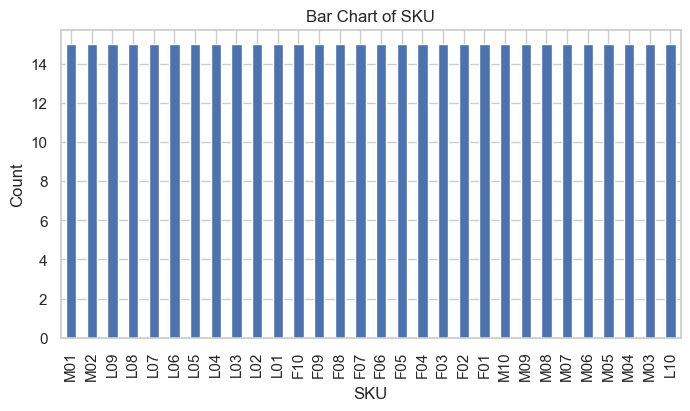

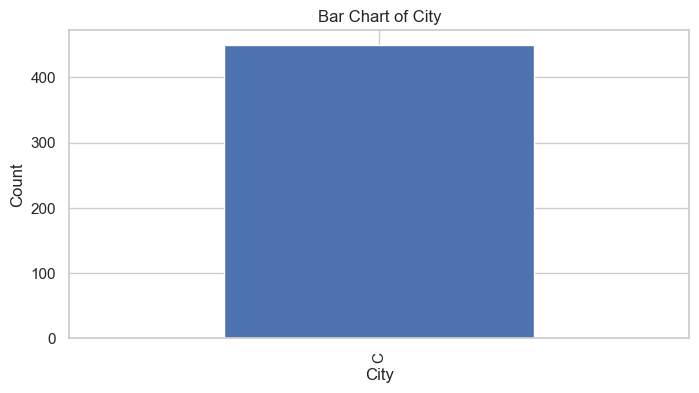

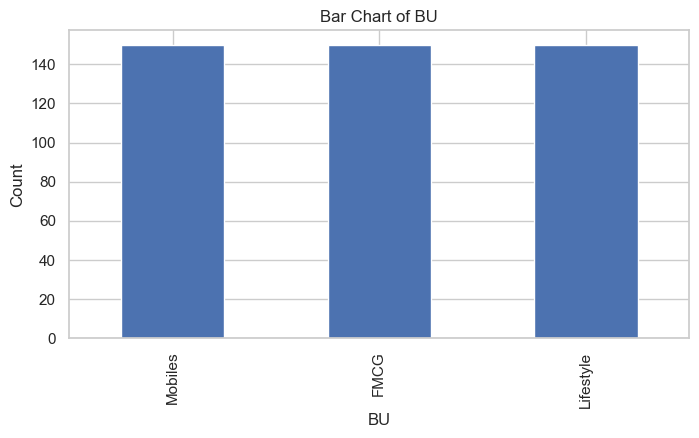

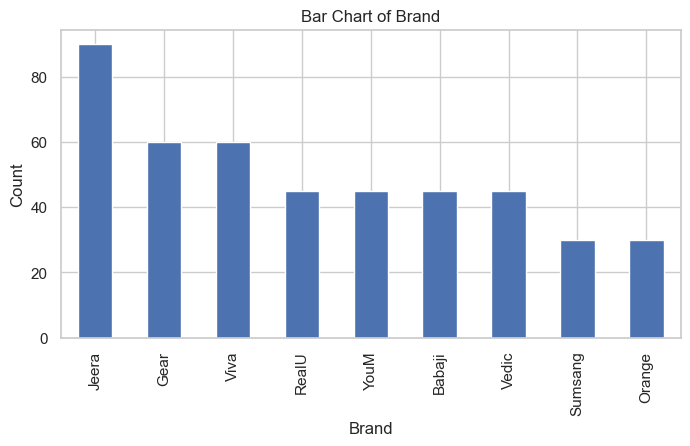

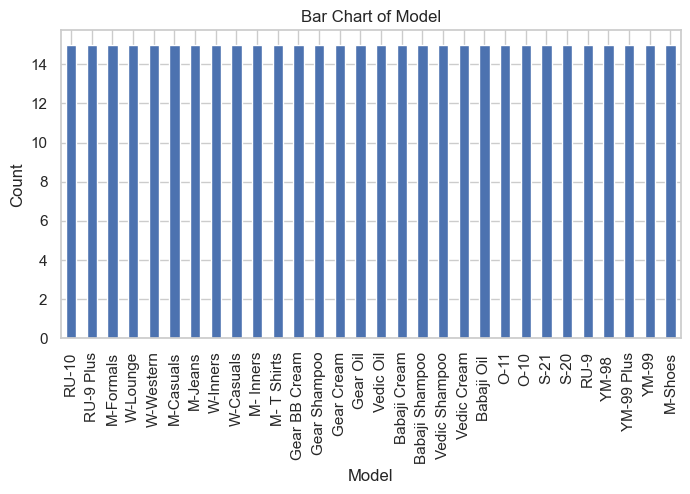

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 2. Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# 3. Bar charts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("First 5 rows after Z-Score Normalization:")
print(df_standardized[numerical_cols].head())

First 5 rows after Z-Score Normalization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [14]:
# Manual Z-score normalization
df_zscore = df.copy()
df_zscore[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

print("First 5 rows after manual Z-Score Normalization:")
print(df_zscore[numerical_cols].head())

First 5 rows after manual Z-Score Normalization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [15]:
# Convert categorical variables to dummy variables using one-hot encoding
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("\nFirst 5 rows after One-Hot Encoding:")
print(df_encoded.head())

print("\nShape of data before encoding:", df.shape)
print("Shape of data after encoding:", df_encoded.shape)

# Display new column names created after encoding
print("\nNew columns created after one-hot encoding:")
new_cols = [col for col in df_encoded.columns if col not in df.columns]
print(new_cols)


First 5 rows after One-Hot Encoding:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Mode